<a href="https://colab.research.google.com/github/youminpark/NEUR265/blob/main/homework/coding_homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #3

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Make a *Code Cell* that imports <code>numpy</code> as <code>np</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, and <code>scipy.stats</code> as <code>stats</code>.

3. Make a *Code Cell* that imports your <code>v_rest_sst.csv</code> and <code>v_rest_pvalb.csv</code> variables as <code>numpy</code> arrays called <code>v_rest_sst</code> and <code>v_rest_pvalb</code> respectively.

4. Make a *Code Cell* that does the following:
  
  a. Finds the means of <code>v_rest_sst</code> and <code>v_rest_pvalb</code>.
  
  b. Performs a t-test to test the null hypothesis that the means of <code>v_rest_sst</code> and <code>v_rest_pvalb</code> come from different distributions.

  c. Plots a histogram of <code>v_rest_sst</code> in one subplot, and a histogram of <code>v_rest_pvalb</code> in another subplot if the p-value of the t-test is > 0.05. You can make two subplots using the syntax <code>fig, ax = plt.subplots(1,1)</code>. You should use an <code>if</code> statement to accomplish this.

  d. Labels the y-axis and x-axis of your histograms (recall that <code>ax.ylabel</code> and <code>ax.xlabel</code> are the methods that let you accomplish this).

5. Make a *Code Cell* that defines a function called <code>vrestHist()</code>. This function should execute the code in step 4 when called.

6. Make a *Code Cell* that calls <code>vrestHist()</code>.

7. Make a *Code Cell* that does the following:

    a. Loops through each column of <code>v_rest_sst</code> and <code>v_rest_pvalb</code> and makes a scatter plot with <code>v_rest_sst</code> on the x-axis and <code>v_rest_pvalb</code> on the y-axis.

    b. Each iteration of your loop should plot a different point on the scatter plot. At the end of your loop, you should have only one scatter plot with number of data points equal to the length of <code>v_rest_sst</code> and <code>v_rest_pvalb</code>.

    c. Your loop should plot a <font color = 'red'>red</font> dot if *both* values in <code>v_rest_sst</code> and <code>v_rest_pvalb</code> are greater than -60, a <font color = 'green'>green</font> dot if values in <code>v_rest_sst</code> are greater than -60, but values in <code>v_rest_pvalb</code> are less than -60, a <font color = 'blue'>blue</font> dot if *both* values in <code>v_rest_sst</code> and <code>v_rest_pvalb</code> are less than -60, and a <font color = 'purple'>purple</font> dot if values in <code>v_rest_sst</code> are less than -60, but values in <code>v_rest_pvalb</code> are more than -60.

    d. Labels your y-axis and your x-axis (this code should be outside of your loop).

8. Make a *Code Cell* that defines a function called <code>vrestScatter()</code>. This function should execute the code in step 7 when called.

9. Save a copy of this notebook to your GitHub repo with the title "coding_homework_3.ipynb".

###Youmin Park
*NEUR 265: Intro to Neural Data Analysis*

**February 28, 2024**

In [1]:
# Question 2
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.stats as stats;

In [3]:
# Question 3
sst_url = 'https://raw.githubusercontent.com/youminpark/NEUR265/main/v_rest_sst.csv'
pvalb_url = 'https://raw.githubusercontent.com/youminpark/NEUR265/main/v_rest_pvalb.csv'

v_rest_sst = np.loadtxt(sst_url);
v_rest_pvalb = np.loadtxt(pvalb_url);

7.159828660199036e-09


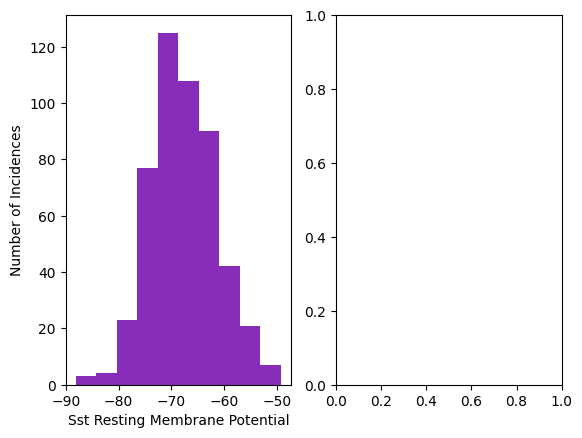

In [20]:
# Question 4.a
sst_mean = np.mean(v_rest_sst);
pvalb_mean = np.mean(v_rest_pvalb);

# Question 4.b
stats.ttest_ind(v_rest_sst,v_rest_pvalb);

# Question 4.c
fig, ax = plt.subplots(1,2);
ax[0].hist(v_rest_sst, color='#862CB9');
ax[0].set_ylabel('Number of Incidences');
ax[0].set_xlabel('Sst Resting Membrane Potential');

t_statistic, pvalue = stats.ttest_ind(v_rest_sst, v_rest_pvalb);
print(pvalue);

if pvalue > 0.05:
   ax[1].hist(v_rest_pvalb, color='#FF5CD4');
   ax[1].set_ylabel('Number of Incidences');
   ax[1].set_xlabel('Pvalb Resting Membrane Potential');


In [22]:
# Question 5
def vrestHist(dataset1, dataset2):
  mean1 = np.mean(dataset1);
  mean2 = np.mean(dataset2);

  stats.ttest_ind(dataset1,dataset2);

  fig, ax = plt.subplots(1,2);
  ax[0].hist(dataset1, color='#862CB9');
  ax[0].set_ylabel('Number of Incidences');
  ax[0].set_xlabel('Sst Resting Membrane Potential');

  t_statistic, pvalue = stats.ttest_ind(dataset1, dataset2);
  print(pvalue);

  if pvalue > 0.05:
    ax[1].hist(dataset2, color='#FF5CD4');
    ax[1].set_ylabel('Number of Incidences');
    ax[1].set_xlabel('Pvalb Resting Membrane Potential');

7.159828660199036e-09


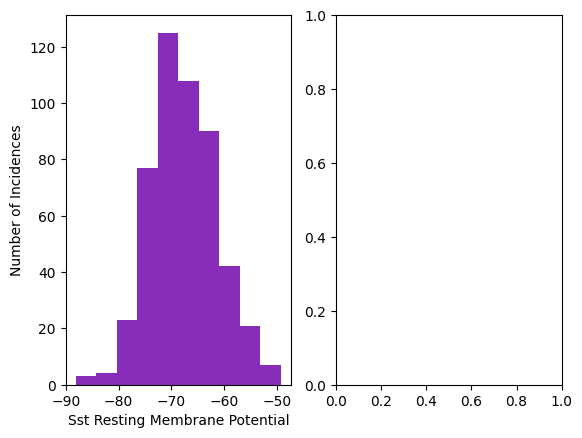

In [24]:
# Question 6
vrestHist(v_rest_sst, v_rest_pvalb)

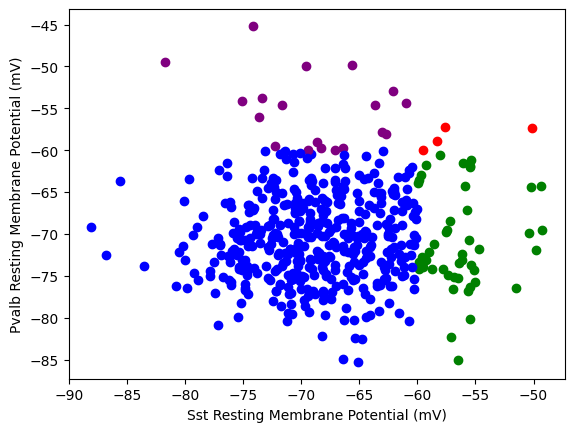

In [29]:
# Question 7
data_length = len(v_rest_sst);

for i in range(data_length):
    if v_rest_sst[i]>-60 and v_rest_pvalb[i]>-60:
      plt.scatter(v_rest_sst[i],v_rest_pvalb[i],color = "red");
    elif v_rest_sst[i]>-60 and v_rest_pvalb[i]<-60:
      plt.scatter(v_rest_sst[i],v_rest_pvalb[i],color = "green");
    elif v_rest_sst[i]<-60 and v_rest_pvalb[i]<-60:
      plt.scatter(v_rest_sst[i],v_rest_pvalb[i],color = "blue");
    elif v_rest_sst[i]<-60 and v_rest_pvalb[i]>-60:
      plt.scatter(v_rest_sst[i],v_rest_pvalb[i],color = "purple");

plt.xlabel('Sst Resting Membrane Potential (mV)');
plt.ylabel('Pvalb Resting Membrane Potential (mV)');

In [30]:
# Question 8
def vrestScatter(dataset1, dataset2):
  data_length = len(dataset1);

  for i in range(data_length):
      if dataset1[i]>-60 and dataset2[i]>-60:
        plt.scatter(dataset1[i],dataset2[i],color = "red");
      elif dataset1[i]>-60 and dataset2[i]<-60:
        plt.scatter(dataset1[i],dataset2[i],color = "green");
      elif dataset1[i]<-60 and dataset2[i]<-60:
        plt.scatter(dataset1[i],dataset2[i],color = "blue");
      elif dataset1[i]<-60 and dataset2[i]>-60:
        plt.scatter(dataset1[i],dataset2[i],color = "purple");

  plt.xlabel('Sst Resting Membrane Potential (mV)');
  plt.ylabel('Pvalb Resting Membrane Potential (mV)');

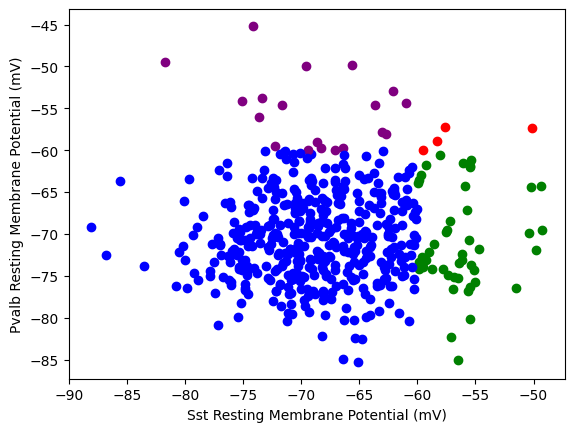

In [31]:
# Functionality Check for Question 8 (it's a treat for me)
vrestScatter(v_rest_sst,v_rest_pvalb)